# Un aire no tan bueno

- Ortega Ibarra Jaime Jesús
- Martiñón Luna Jonathan José


## Importando librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Leyendo los datos

### Indices por año


#### 2020

In [151]:
indice_2020 = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/imeca_2020.csv?raw=True')
indice_2020.head()

,Fecha,Hora,Noroeste ozono,Noroeste dióxido de azufre,Noroeste dióxido de nitrógeno,Noroeste monóxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste dióxido de azufre,...,Suroeste dióxido de nitrógeno,Suroeste monóxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste dióxido de azufre,Sureste dióxido de nitrógeno,Sureste monóxido de carbono,Sureste PM10,Sureste PM25
0,01/01/2020,1,4,36,17,9,81,63,9,28,...,16,5,35,54,9,8,17,12,73,72
1,01/01/2020,2,4,32,15,11,86,64,11,22,...,14,6,40,56,13,8,16,14,81,76
2,01/01/2020,3,4,26,16,12,91,66,9,18,...,15,6,49,59,13,8,15,15,91,80
3,01/01/2020,4,6,24,16,14,101,68,9,16,...,15,7,57,63,16,8,10,15,100,83
4,01/01/2020,5,5,22,15,15,104,72,5,16,...,14,7,64,67,16,8,9,14,102,83


In [152]:
indice_2020.shape

(8040, 32)

In [153]:
indice_2020.columns

Index(['Fecha', 'Hora', 'Noroeste ozono', 'Noroeste dióxido de azufre',
       'Noroeste dióxido de nitrógeno', 'Noroeste monóxido de carbono',
       'Noroeste PM10', 'Noroeste PM25', 'Noreste ozono',
       'Noreste dióxido de azufre', 'Noreste dióxido de nitrógeno',
       'Noreste monóxido de carbono', 'Noreste PM10', 'Noreste PM25',
       'Centro ozono', 'Centro dióxido de azufre',
       'Centro dióxido de nitrógeno', 'Centro monóxido de carbono',
       'Centro PM10', 'Centro PM25', 'Suroeste ozono',
       'Suroeste dióxido de azufre', 'Suroeste dióxido de nitrógeno',
       'Suroeste monóxido de carbono', 'Suroeste PM10', 'Suroeste PM25',
       'Sureste ozono', 'Sureste dióxido de azufre',
       'Sureste dióxido de nitrógeno', 'Sureste monóxido de carbono',
       'Sureste PM10', 'Sureste PM25'],
      dtype='object')

#### 2019

### Calidad del aire

In [7]:
calidad_aire = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/prueba_datos_calidad_aire.csv?raw=True')
calidad_aire.head()

,fecha_actualizacion,alcaldia_municipio,indice,riesgo,recomendacion_uno,recomendacion_dos,recomendacion_tres
0,2021-01-04 17:00:31,AZCAPOTZALCO,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
1,2021-01-04 17:00:31,BENITO JUAREZ,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
2,2021-01-04 17:00:31,COYOACAN,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
3,2021-01-04 17:00:31,CUAJIMALPA DE MORELOS,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
4,2021-01-04 17:00:31,CUAUHTEMOC,SIN COBERTURA,NaN,NaN,NaN,NaN


### Explorando los datos

In [8]:
calidad_aire.shape

(46, 7)

In [9]:
calidad_aire.columns

Index(['fecha_actualizacion', 'alcaldia_municipio', 'indice', 'riesgo',
       'recomendacion_uno', 'recomendacion_dos', 'recomendacion_tres'],
      dtype='object')

In [10]:
calidad_aire.dtypes

fecha_actualizacion    object
alcaldia_municipio     object
indice                 object
riesgo                 object
recomendacion_uno      object
recomendacion_dos      object
recomendacion_tres     object
dtype: object

In [13]:
calidad_aire.isnull().sum()

fecha_actualizacion     0
alcaldia_municipio      0
indice                  0
riesgo                 15
recomendacion_uno      16
recomendacion_dos      16
recomendacion_tres     17
dtype: int64

In [22]:
for col in calidad_aire.columns:
    print('-------------------')
    print(calidad_aire[col].unique())

-------------------
['2021-01-04 17:00:31']
-------------------
['AZCAPOTZALCO' 'BENITO JUAREZ' 'COYOACAN' 'CUAJIMALPA DE MORELOS'
 'CUAUHTEMOC' 'IZTAPALAPA' 'LA MAGDALENA CONTRERAS' 'XOCHIMILCO'
 'VALLE DE CHALCO' 'IXTAPALUCA' 'NEZAHUALCOYOTL' 'CHIMALHUACAN'
 'CHICOLOAPAN' 'ATENCO' 'ECATEPEC' 'TECAMAC' 'JALTENCO' 'TEOLOYUCAN'
 'MELCHOR OCAMPO' 'CUAUTITLAN IZCALLI' 'TULTEPEC' 'TLALNEPANTLA ANEXO'
 'OCOYOACAC' 'GUSTAVO A. MADERO' 'IZTCACALCO' 'MIGUEL HIDALGO' 'TLAHUAC'
 'ACOLMAN' 'TULTITLAN' 'CUAUTITLAN' 'TLALNEPANTLA' 'HUIXQUILUCAN'
 'ALVARO OBREGON' 'MILPA ALTA' 'TLALPAN' 'VENUSTIANO CARRANZA' 'CHALCO'
 'LA PAZ' 'COACALCO' 'TULTITLAN ANEXO' 'TONANITLA' 'NEXTLALPAN'
 'TEPOTZOTLAN' 'ATIZAPAN DE ZARAGOZA' 'NAUCALPAN' 'TEXCOCO']
-------------------
['REGULAR' 'SIN COBERTURA' 'BUENA']
-------------------
['Aceptable' nan 'Sin riesgo']
-------------------
['Puedes realizar actividades al aire libre' nan]
-------------------
['Puedes ejercitarte al aire libre' nan]
-------------------
['Pers

In [6]:
set(calidad_aire['fecha_actualizacion'])

{'2021-01-04 17:00:31'}

In [7]:
set(calidad_aire['indice'])

{'BUENA', 'REGULAR', 'SIN COBERTURA'}

In [8]:
set(calidad_aire['riesgo'])

{'Aceptable', 'Sin riesgo', nan}

In [9]:
set(calidad_aire['recomendacion_uno'])

{'Puedes realizar actividades al aire libre', nan}

### Tiraderos clandestinos

In [165]:
tiraderos_clandestinos = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/tiraderos-clandestinos-al-cierre-de-2017.csv?raw=True')
tiraderos_clandestinos.head()

,Column 1,FID_,id_sedema,no_alcaldi,alcaldia,direccion_,tipo_tirad,calle,no_ext,no_int,colonia,entre_que_,longitud,latitud,geo_point
0,6,6,567,14,Benito Juarez,NaN,NaN,"Municipio Libre Es2Quina Miraflores, Colonia P...",NaN,NaN,PORTALES ORIENTE,NaN,-99.139980,19.367720,"19.36772,-99.13998"
1,41,41,402,9,Milpa Alta,NaN,NaN,Av. Hifalgo Y 2Ç÷ Cjon De Independencia,NaN,NaN,SAN PEDRO ATOCPAN,NaN,-99.042876,19.203210,"19.2032099,-99.0428762"
2,78,78,508,11,Tlahuac,NaN,NaN,Angƒ??lica Paulet,NaN,NaN,LA NOPALERA,NaN,-99.055393,19.296997,"19.296997,-99.055393"
3,81,81,62,3,Coyoacan,NaN,NaN,Bodega De Barrido Manual Santa Cecilia,NaN,NaN,CTM SECCIÇÿN 10,NaN,-99.107160,19.300200,"19.3002,-99.1071599"
4,83,83,498,11,Tlahuac,NaN,NaN,Av. Tl¶ÿ¶Huac,NaN,NaN,LA NOPALERA,NaN,-99.054197,19.302147,"19.302147,-99.054197"


In [11]:
tiraderos_clandestinos['alcaldia'].value_counts()

Cuauhtemoc             274
Iztapalapa             219
Benito Juarez          147
Venustiano Carranza    109
Alvaro Obregon          77
Miguel Hidalgo          69
Coyoacan                68
Azcapotzalco            47
Iztacalco               47
Tlahuac                 35
Milpa Alta              13
Xochimilco              12
Magdalena Contreras      5
Cuajimalpa               5
Tlalpan                  2
Name: alcaldia, dtype: int64

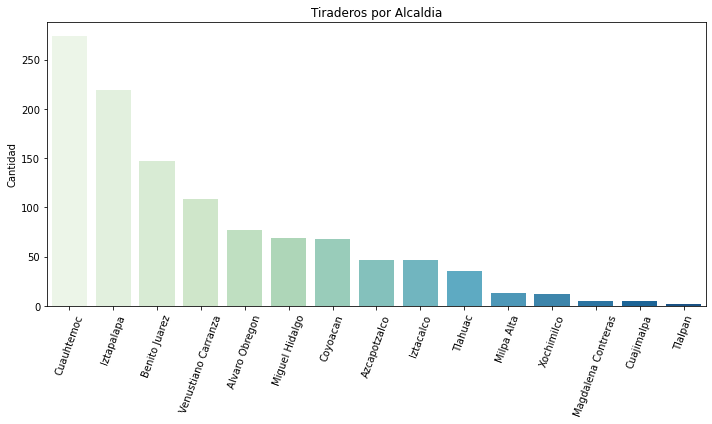

In [12]:
plt.figure(figsize=(10,6))
tiraderos_alcaldias = sns.countplot(x = "alcaldia", data=tiraderos_clandestinos,palette="GnBu", 
                                   order = tiraderos_clandestinos['alcaldia'].value_counts().index)
plt.title("Tiraderos por Alcaldia")
plt.ylabel('Cantidad')
plt.xlabel('')
# plt.yscale('log')
tiraderos_alcaldias.set_xticklabels(tiraderos_alcaldias.get_xticklabels(),rotation=70) 
plt.tight_layout()
plt.show()

### Niveles de plomo en el aire

In [169]:
nivel_plomo = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/red_manual_plomo.csv?raw=True'
                          ,skiprows=8)
nivel_plomo.head()

,Date,cve_station,cve_parameter,value,unit
0,08/01/1989,CES,PbPST,1.55,2
1,08/01/1989,MER,PbPST,2.69,2
2,08/01/1989,PED,PbPST,0.87,2
3,08/01/1989,TLA,PbPST,1.41,2
4,08/01/1989,XAL,PbPST,3.17,2


In [172]:
nivel_plomo.shape

(21975, 5)

In [170]:
a = list(nivel_plomo.columns)
b = list(nivel_plomo.dtypes)
c = list(nivel_plomo.isnull().sum())
for i in range(len(nivel_plomo.columns)):
    print(f'{a[i]} & \\textit{{{b[i]}}} & {c[i]} & {round(((nivel_plomo.shape[0]-c[i])/nivel_plomo.shape[0])*100,2)}\% & ---\\\\')
    print('\\hline')

Date & \textit{object} & 0 & 100.0\% & ---\\
\hline
cve_station & \textit{object} & 0 & 100.0\% & ---\\
\hline
cve_parameter & \textit{object} & 0 & 100.0\% & ---\\
\hline
value & \textit{float64} & 0 & 100.0\% & ---\\
\hline
unit & \textit{int64} & 0 & 100.0\% & ---\\
\hline


In [171]:
for col in nivel_plomo.columns:
    print()
    print('---------------')
    print(col)
    print()
    print(nivel_plomo[col].unique())


---------------
Date

['08/01/1989' '14/01/1989' '20/01/1989' ... '16/10/2017' '22/10/2017'
 '28/10/2017']

---------------
cve_station

['CES' 'MER' 'PED' 'TLA' 'XAL' 'MCM' 'FAN' 'TEC' 'CFE' 'XCH' 'MON' 'NEZ'
 'UIZ' 'LPR' 'LOM' 'SHA' 'HAN' 'TAX' 'POT']

---------------
cve_parameter

['PbPST' 'PbPM10']

---------------
value

[1.55   2.69   0.87   ... 0.0309 0.0301 0.    ]

---------------
unit

[2]


### Afluencia en Transporte público

In [23]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/afluencia-preliminar-en-transporte-publico.csv?raw=true'
afluencia_transport = pd.read_csv(url)
afluencia_transport.head()

,FECHA,DÍA MES,DÍA SEMANA,MES,AÑO,ORGANISMO,LINEA/SERVICIO,AFLUENCIA TARJETA,AFLUENCIA BOLETO,AFLUENCIA TOTAL\n(cifras preliminares)
0,2020-03-01,1,Domingo,2020-03,2020,Ecobici,NaN,NaN,NaN,11238.0
1,2020-03-02,2,Lunes,2020-03,2020,Ecobici,NaN,NaN,NaN,29475.0
2,2020-03-04,4,Miércoles,2020-03,2020,Ecobici,NaN,NaN,NaN,31477.0
3,2020-03-05,5,Jueves,2020-03,2020,Ecobici,NaN,NaN,NaN,31493.0
4,2020-03-06,6,Viernes,2020-03,2020,Ecobici,NaN,NaN,NaN,29035.0


### Explorando

In [24]:
afluencia_transport.shape

(11315, 10)

In [25]:
afluencia_transport.columns

Index(['FECHA', 'DÍA MES', 'DÍA SEMANA', 'MES', 'AÑO', 'ORGANISMO',
       'LINEA/SERVICIO', 'AFLUENCIA TARJETA', 'AFLUENCIA BOLETO',
       'AFLUENCIA TOTAL\n(cifras preliminares)'],
      dtype='object')

In [27]:
afluencia_transport.dtypes

FECHA                                      object
DÍA MES                                     int64
DÍA SEMANA                                 object
MES                                        object
AÑO                                         int64
ORGANISMO                                  object
LINEA/SERVICIO                             object
AFLUENCIA TARJETA                         float64
AFLUENCIA BOLETO                          float64
AFLUENCIA TOTAL\n(cifras preliminares)    float64
dtype: object

In [29]:
afluencia_transport.isnull().sum()

FECHA                                        0
DÍA MES                                      0
DÍA SEMANA                                   0
MES                                          0
AÑO                                          0
ORGANISMO                                    0
LINEA/SERVICIO                             305
AFLUENCIA TARJETA                         9753
AFLUENCIA BOLETO                          9159
AFLUENCIA TOTAL\n(cifras preliminares)     107
dtype: int64

### Escuelas por zona

Escuelas públicas

In [45]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/Escuelas/escuelas-publicas.csv?raw=true'
escuelas_publicas = pd.read_csv(url)
escuelas_publicas.head()

,Nombre,Domicilio con nombre,Coordenadas,Latitud,Longitud,Geopoint,Domicilio
0,TELESECUNDARIA 63,DOMICILIO: ADMON U HAB CAMPAÑA DEL EBANO Y C C...,"-99.05424199980791,19.35316300009179,0",19.353163,-99.054242,"19.3531630001,-99.0542419998","ADMON U HAB CAMPAÑA DEL EBANO Y C CELAYA S/N, ..."
1,PREESCOLAR GENERAL CON SERVICIO ASISTENCIAL - ...,"DOMICILIO: PLAYA FLAMINGOS NO 1, MILITAR MARTE...","-99.12558263181295,19.37922441798433,0",19.379224,-99.125583,"19.379224418,-99.1255826318","PLAYA FLAMINGOS NO 1, MILITAR MARTE, DELEGACIO..."
2,PREESCOLAR GENERAL - ESTADO DE ZACATECAS,"DOMICILIO: CANAL DE SAN JUAN Y SUR 14 C, AGRIC...","-99.05933678879129,19.39268897307597,0",19.392689,-99.059337,"19.3926889731,-99.0593367888","CANAL DE SAN JUAN Y SUR 14 C, AGRICOLA ORIENTA..."
3,PRIMARIA GENERAL - PROFRA. AMANDA PALAFOX Y BAZ,"DOMICILIO: MONTE ELBRUZ NO 15, LOS VOLCANES, D...","-99.17674771482122,19.2697621281349,0",19.269762,-99.176748,"19.2697621281,-99.1767477148","MONTE ELBRUZ NO 15, LOS VOLCANES, DELEGACION T..."
4,PRIMARIA GENERAL - VALENTIN ZAMORA OROZCO,"DOMICILIO: RETORNO 33 Y 34 S/N, AVANTE, DELEGA...","-99.13093319192899,19.32847431855964,0",19.328474,-99.130933,"19.3284743186,-99.1309331919","RETORNO 33 Y 34 S/N, AVANTE, DELEGACION COYOAC..."


In [46]:
escuelas_publicas.shape

(2383, 7)

In [47]:
escuelas_publicas.columns

Index(['Nombre', 'Domicilio con nombre', 'Coordenadas', 'Latitud', 'Longitud',
       'Geopoint', 'Domicilio'],
      dtype='object')

In [48]:
escuelas_publicas.dtypes

Nombre                   object
Domicilio con nombre     object
Coordenadas              object
Latitud                 float64
Longitud                float64
Geopoint                 object
Domicilio                object
dtype: object

In [53]:
round(((2383-36)/2383)*100,2)

98.49

In [49]:
escuelas_publicas.isnull().sum()

Nombre                    0
Domicilio con nombre      0
Coordenadas             137
Latitud                 141
Longitud                139
Geopoint                141
Domicilio                36
dtype: int64

In [17]:
delegacion = []
for i in range(len(escuelas_publicas)):
    if type(escuelas_publicas['Domicilio'][i]) != float:
        deleg = escuelas_publicas['Domicilio'][i].split("DELEGACION")
        if len(deleg) > 1:
            delegacion.append(deleg[1].split(',')[0])
        else:
            delegacion.append('NO DISPONIBLE')      
    else:
        delegacion.append('NO DISPONIBLE')

In [18]:
escuelas_publicas['Delegacion'] = delegacion

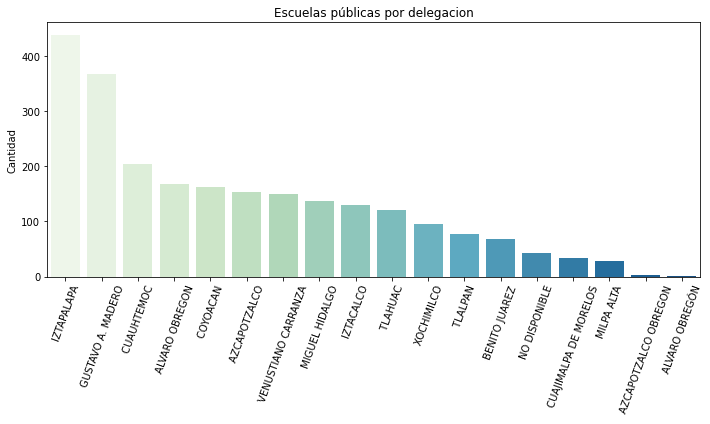

In [19]:
plt.figure(figsize=(10,6))
escuelas_publicas_alcaldia = sns.countplot(x = "Delegacion", data=escuelas_publicas, palette="GnBu", 
                                          order = escuelas_publicas['Delegacion'].value_counts().index)
plt.title("Escuelas públicas por delegacion")
plt.ylabel('Cantidad')
plt.xlabel('')
# plt.yscale('log')
escuelas_publicas_alcaldia.set_xticklabels(escuelas_publicas_alcaldia.get_xticklabels(), rotation=70) 
plt.tight_layout()
plt.show()

Escuelas privadas

In [56]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/Escuelas/escuelas-privadas.csv?raw=true'
escuelas_privadas = pd.read_csv(url)
escuelas_privadas.head()

,NIVEL,NOMBRE,TURNO,DOMICILIO,COLONIA,ALCALDÍA,SOSTENIMIENTO,ubicacion,lat,lon,coordenadas
0,INICIAL,CENDI PART SEDI LOMAS,MATUTINO,EXPLANADA NO. 305,LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,Particular,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",19.425154,-99.211154,"19.4251542,-99.211154"
1,INICIAL,ARMONIA INFANTIL,MATUTINO,AV. SINATEL No 38 MZ. 4 LT. 21,SINATEL AMPLIACION,IZTAPALAPA,Particular,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",19.364828,-99.131801,"19.3648281,-99.1318013"
2,INICIAL,CENDI PART. COLEGIO DE LAS BALEARES,TIEMPO COMPLETO,JOSEFA ORTIZ DE DOMINGUEZ NO 2,TIZAPAN,ALVARO OBREGON,Particular,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",19.335167,-99.202637,"19.3351668,-99.202637"
3,INICIAL,"CENDI PART COLEGIO CIBELES, S.C.",MATUTINO,RIO GRIJALVA NUM 27,CUAUHTEMOC,CUAUHTEMOC,Particular,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",19.433640,-99.170147,"19.4336398,-99.1701471"
4,INICIAL,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,TIEMPO COMPLETO,CALLE 11 DE ENERO DE 1861 NO. 2114,LEYES DE REFORMA,IZTAPALAPA,Particular,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",19.382636,-99.066102,"19.3826355,-99.0661015"


In [60]:
escuelas_privadas.shape

(3696, 11)

In [57]:
escuelas_privadas.columns

Index(['NIVEL', 'NOMBRE', 'TURNO', 'DOMICILIO', 'COLONIA', 'ALCALDÍA',
       'SOSTENIMIENTO', 'ubicacion', 'lat', 'lon', 'coordenadas'],
      dtype='object')

In [58]:
escuelas_privadas.dtypes

NIVEL             object
NOMBRE            object
TURNO             object
DOMICILIO         object
COLONIA           object
ALCALDÍA          object
SOSTENIMIENTO     object
ubicacion         object
lat              float64
lon              float64
coordenadas       object
dtype: object

In [59]:
escuelas_privadas.isnull().sum()

NIVEL             0
NOMBRE            0
TURNO             0
DOMICILIO         0
COLONIA           0
ALCALDÍA          0
SOSTENIMIENTO     0
ubicacion         0
lat              37
lon              37
coordenadas      37
dtype: int64

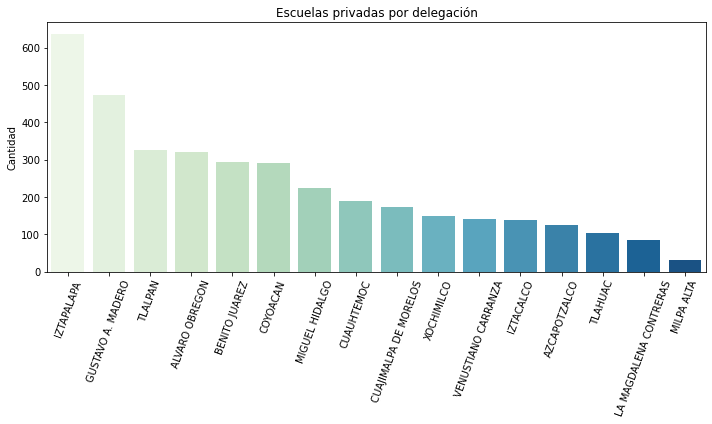

In [21]:
plt.figure(figsize=(10,6))
escuelas_privadas_alcaldia = sns.countplot(x = "ALCALDÍA", data=escuelas_privadas,palette="GnBu", 
                                          order = escuelas_privadas['ALCALDÍA'].value_counts().index)
plt.title("Escuelas privadas por delegación")
plt.ylabel('Cantidad')
plt.xlabel('')
escuelas_privadas_alcaldia.set_xticklabels(escuelas_privadas_alcaldia.get_xticklabels(), rotation=70) 
plt.tight_layout()
plt.show()

### Mercados públicos por zona

In [64]:
mercados = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/mercados-publicos.csv?raw=True')
mercados.head()

,numero,alcaldia,nombre mercado,numero oficial,numero de locales,latitud,longitud,coord
0,21.0,AZCAPOTZALCO,COSMOPOLITA,138.0,135.0,19.475223,-99.161796,"19.4752229147,-99.1617959999"
1,35.0,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,141.0,177.0,19.467591,-99.163067,"19.4675909147,-99.1630669999"
2,26.0,AZCAPOTZALCO,OBRERO POPULAR,142.0,125.0,19.463233,-99.173568,"19.4632329148,-99.1735679999"
3,19.0,AZCAPOTZALCO,BENITO JUAREZ,167.0,123.0,19.475726,-99.176803,"19.4757259147,-99.1768029999"
4,70.0,COYOACAN,SANTA URSULA COAPA (PESCADITOS),154.0,268.0,19.311774,-99.150337,"19.3117739152,-99.1503369999"


In [68]:
mercados.shape

(329, 8)

In [65]:
mercados.columns

Index(['numero', 'alcaldia', 'nombre mercado', 'numero oficial',
       'numero de locales', 'latitud', 'longitud', 'coord'],
      dtype='object')

In [66]:
mercados.dtypes

numero               float64
alcaldia              object
nombre mercado        object
numero oficial       float64
numero de locales    float64
latitud              float64
longitud             float64
coord                 object
dtype: object

In [67]:
mercados.isnull().sum()

numero               0
alcaldia             0
nombre mercado       0
numero oficial       0
numero de locales    0
latitud              0
longitud             0
coord                0
dtype: int64

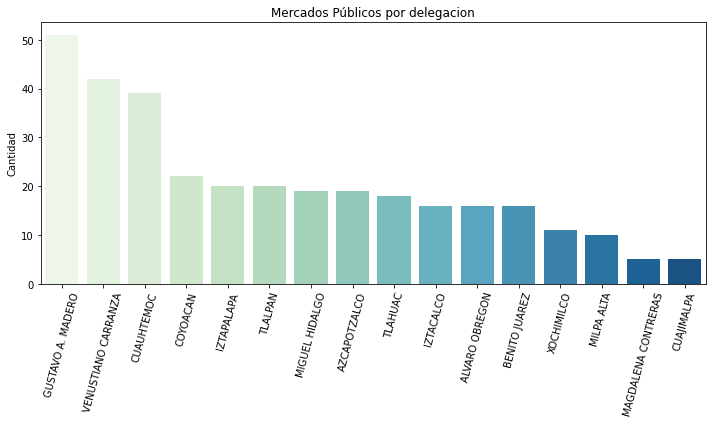

In [23]:
plt.figure(figsize=(10,6))
mercados_alcaldias = sns.countplot(x = "alcaldia", data=mercados,palette="GnBu",
                                  order = mercados['alcaldia'].value_counts().index)
plt.title("Mercados Públicos por delegacion")
plt.ylabel('Cantidad')
mercados_alcaldias.set_xticklabels(mercados_alcaldias.get_xticklabels(), rotation=75)
plt.xlabel('')
plt.tight_layout()
plt.show()

### Indices de Parquímetros

In [70]:
parquimetros = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/prueba-parquimetros.csv?raw=True')
parquimetros.head()

,Alcaldía,Polígono,Colonia,Año,Mes,Ingreso por Estacionamiento en Vía Pública,Contraprestación 30% (F),Ingreso por Retiro de Candado Inmovilizador,70% Inmovilizador (H),Pago al GCDMX (F-H)
0,Miguel Hidalgo,Polanco,Palmitas,2012,Febrero,204270.0,61281.0,0.0,0.0,61281.0
1,Miguel Hidalgo,Polanco,Los Morales,2012,Junio,464162.0,139248.6,0.0,0.0,139248.6
2,Miguel Hidalgo,Polanco,Rincón del Bosque,2012,Junio,99802.0,29940.6,0.0,0.0,29940.6
3,Miguel Hidalgo,Polanco,Morales Secc. Palmas,2012,Junio,337447.0,101234.1,0.0,0.0,101234.1
4,Miguel Hidalgo,Polanco,Polanco Reforma,2012,Julio,1133326.0,339997.8,0.0,0.0,339997.8


In [71]:
parquimetros.shape

(2482, 10)

In [72]:
parquimetros.columns

Index(['Alcaldía', 'Polígono ', 'Colonia ', 'Año', 'Mes',
       'Ingreso por Estacionamiento en Vía Pública ',
       'Contraprestación 30%                                (F)             ',
       'Ingreso por Retiro de Candado Inmovilizador',
       '70% Inmovilizador           (H)', 'Pago al GCDMX       (F-H)'],
      dtype='object')

In [73]:
parquimetros.dtypes

Alcaldía                                                                 object
Polígono                                                                 object
Colonia                                                                  object
Año                                                                       int64
Mes                                                                      object
Ingreso por Estacionamiento en Vía Pública                              float64
Contraprestación 30%                                (F)                 float64
Ingreso por Retiro de Candado Inmovilizador                             float64
70% Inmovilizador           (H)                                         float64
Pago al GCDMX       (F-H)                                               float64
dtype: object

In [75]:
parquimetros.isnull().sum()

Alcaldía                                                                  0
Polígono                                                                  0
Colonia                                                                   0
Año                                                                       0
Mes                                                                       0
Ingreso por Estacionamiento en Vía Pública                              115
Contraprestación 30%                                (F)                  26
Ingreso por Retiro de Candado Inmovilizador                             138
70% Inmovilizador           (H)                                          27
Pago al GCDMX       (F-H)                                                23
dtype: int64

In [25]:
#Por alguna razon no muestra
#parquimetros["Colonia"]

#@Jhonny
# Respuesta: No lo mostraba porque no es 'Colonia', es 'Colonia ', te faltaba un espacio 

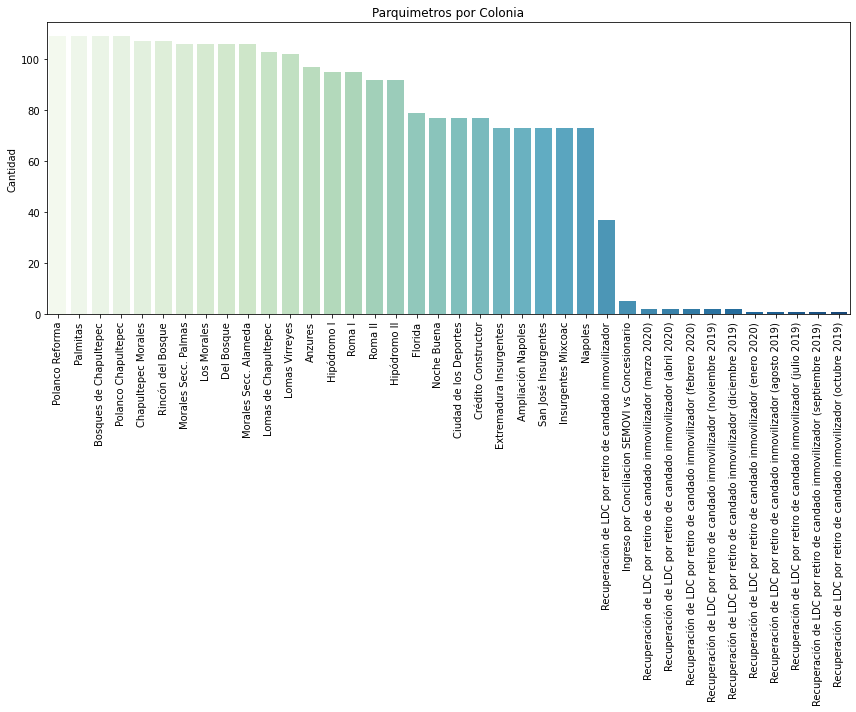

In [90]:
plt.figure(figsize=(12,10))

parquimetros_alcaldia = sns.countplot(x = "Colonia ", data=parquimetros, palette="GnBu", 
                                     order = parquimetros['Colonia '].value_counts().index)
plt.title("Parquimetros por Colonia")
plt.ylabel('Cantidad')
plt.xlabel('')
parquimetros_alcaldia.set_xticklabels(parquimetros_alcaldia.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

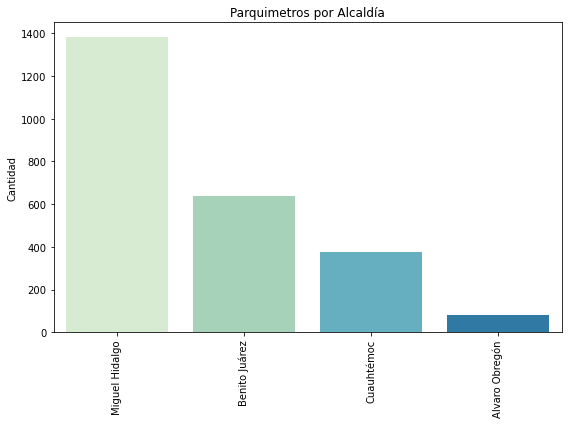

In [93]:
plt.figure(figsize=(8,6))

parquimetros_alcaldia = sns.countplot(x = "Alcaldía", data=parquimetros, palette="GnBu", 
                                     order = parquimetros['Alcaldía'].value_counts().index)
plt.title("Parquimetros por Alcaldía")
plt.ylabel('Cantidad')
plt.xlabel('')
parquimetros_alcaldia.set_xticklabels(parquimetros_alcaldia.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

### Areas Verdes CDMX

In [94]:
url = 'https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/cdmx_areas_verdes_2017.csv?raw=True'
areas_verdes = pd.read_csv(url)
areas_verdes.head()

,Geo Point,Geo Shape,muerdago,p_sp_her_d,zonifica,subcat_sed,subcve_sed,p_manejo,tipo,p_sp_abs_d,...,p_sp_arb_d,p_herbaceo,p_sp_do_mu,p_arboreo,categoria_,superficie,e_urbano,perimetro,cve_sedema,responsabl
0,"19.4877568178,-99.2060645931","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Panteones,604.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,6660.027554,NaN,329.264738,600,NaN
1,"19.3887689803,-99.116393168","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Deportivos,601.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,2917.257837,NaN,272.243614,600,NaN
2,"19.3928871121,-99.0869912505","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Camellones centrales y laterales,203.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Áreas verdes complementarias o ligadas a la re...,1086.305646,NaN,425.043656,200,NaN
3,"19.383106069,-99.1073609486","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,3605.704046,NaN,269.209436,600,NaN
4,"19.3822134465,-99.1028423436","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,19619.361577,NaN,798.409227,600,NaN


In [95]:
areas_verdes.shape

(11739, 28)

In [96]:
areas_verdes.columns

Index(['Geo Point', 'Geo Shape', 'muerdago', 'p_sp_her_d', 'zonifica',
       'subcat_sed', 'subcve_sed', 'p_manejo', 'tipo', 'p_sp_abs_d',
       'f_decreto', 'direccion', 'gid', 'cve_delg', 'p_arbustiv', 'ubicacion',
       'nombre', 'delegacion', 'p_sp_arb_d', 'p_herbaceo', 'p_sp_do_mu',
       'p_arboreo', 'categoria_', 'superficie', 'e_urbano', 'perimetro',
       'cve_sedema', 'responsabl'],
      dtype='object')

In [112]:
round(((11739-11738)/11739)*100,2)

0.01

In [97]:
areas_verdes.isnull().sum()

Geo Point        64
Geo Shape        64
muerdago          4
p_sp_her_d    11606
zonifica      11739
subcat_sed       47
subcve_sed       13
p_manejo      11739
tipo          11735
p_sp_abs_d    11608
f_decreto     11739
direccion      1667
gid               0
cve_delg          0
p_arbustiv    11608
ubicacion      8222
nombre         6055
delegacion        0
p_sp_arb_d    11514
p_herbaceo    11608
p_sp_do_mu    11608
p_arboreo     11608
categoria_        0
superficie       56
e_urbano      11739
perimetro        56
cve_sedema        0
responsabl    11738
dtype: int64

In [98]:
areas_verdes.dtypes

Geo Point      object
Geo Shape      object
muerdago       object
p_sp_her_d    float64
zonifica      float64
subcat_sed     object
subcve_sed    float64
p_manejo      float64
tipo           object
p_sp_abs_d    float64
f_decreto     float64
direccion      object
gid             int64
cve_delg        int64
p_arbustiv    float64
ubicacion      object
nombre         object
delegacion     object
p_sp_arb_d     object
p_herbaceo    float64
p_sp_do_mu    float64
p_arboreo     float64
categoria_     object
superficie    float64
e_urbano      float64
perimetro     float64
cve_sedema      int64
responsabl    float64
dtype: object

In [28]:
areas_verdes['delegacion'].value_counts()

Iztapalapa               2129
Coyoacán                 1806
Azcapotzalco              960
Miguel Hidalgo            925
Gustavo A. Madero         835
Tlalpan                   735
Álvaro Obregón            721
Venustiano Carranza       634
Tláhuac                   581
Cuauhtémoc                567
Benito Juárez             484
Cuajimalpa de Morelos     448
Iztacalco                 386
Magdalena Contreras       202
Xochimilco                196
Milpa Alta                130
Name: delegacion, dtype: int64

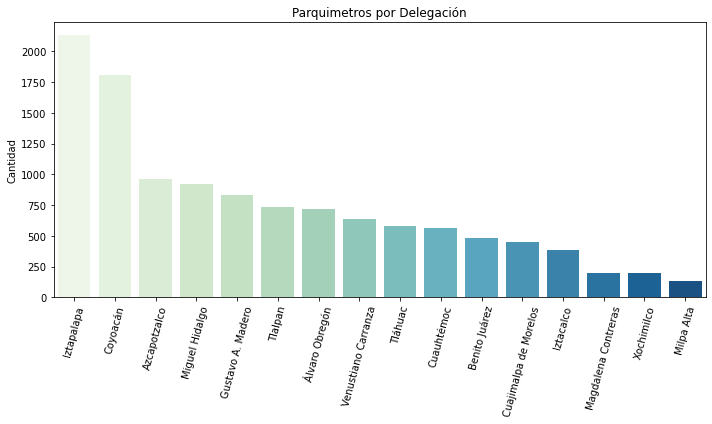

In [29]:
plt.figure(figsize=(10,6))
areas_verdes_delegacion = sns.countplot(x='delegacion', data=areas_verdes, palette="GnBu",
                                       order = areas_verdes['delegacion'].value_counts().index)
plt.title("Parquimetros por Delegación")
plt.ylabel('Cantidad')
plt.xlabel('')
areas_verdes_delegacion.set_xticklabels(areas_verdes_delegacion.get_xticklabels(),rotation=75)

plt.tight_layout()
plt.show()

In [30]:
areas_verdes['Geo Shape'][1]

'{"type": "MultiPolygon", "coordinates": [[[[-99.11678804338746, 19.389035577395834], [-99.11637228211686, 19.388873052535505], [-99.11608502887533, 19.388823917112617], [-99.11590738542336, 19.388823917112617], [-99.11582801281715, 19.388816357816783], [-99.11585069070463, 19.38872942591474], [-99.11585447035255, 19.388650053308538], [-99.11585447035255, 19.388627375421056], [-99.11607746957951, 19.388623595773133], [-99.11682961951452, 19.388642494012707], [-99.11678804338746, 19.389035577395834]]]]}'

In [31]:
datos = "https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/cdmx_areas_verdes_2017.geojson?raw=True"
map_data = gpd.read_file(datos)
map_data.head()

,muerdago,categoria,p_manejo,cve_sedema,subcat_sed,direccion,subcve_sed,gid,cve_delg,superficie,...,p_sp_her_d,p_herbaceo,p_sp_do_mu,p_sp_arb_d,p_sp_abs_d,p_arboreo,p_arbustiv,tipo,responsabl,geometry
0,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Joyas,203,427,7,524.826776485,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.11039 19.47311, -99.11124 ..."
1,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Viena,203,1238,4,2986.22013973,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.16022 19.35798, -99.15520 ..."
2,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Texcoco,203,463,7,7719.22948874,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.06610 19.44710, -99.06525 ..."
3,Ausencia,"Parques, arboledas y alamedas",NA,400,Parques,Poniente 6,401,464,7,2301.03245939,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.06236 19.44824, -99.06237 ..."
4,Ausencia,Áreas verdes complementarias o ligadas a la re...,NA,200,Camellones centrales y laterales,Avenida 606,203,494,7,6799.59197474,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-99.05681 19.45814, -99.05677 ..."


In [32]:
list(map_data)

['muerdago',
 'categoria',
 'p_manejo',
 'cve_sedema',
 'subcat_sed',
 'direccion',
 'subcve_sed',
 'gid',
 'cve_delg',
 'superficie',
 'perimetro',
 'delegacion',
 'nombre',
 'ubicacion',
 'p_sp_her_d',
 'p_herbaceo',
 'p_sp_do_mu',
 'p_sp_arb_d',
 'p_sp_abs_d',
 'p_arboreo',
 'p_arbustiv',
 'tipo',
 'responsabl',
 'geometry']

In [33]:
map_data['geometry']

0        MULTIPOLYGON (((-99.11039 19.47311, -99.11124 ...
1        MULTIPOLYGON (((-99.16022 19.35798, -99.15520 ...
2        MULTIPOLYGON (((-99.06610 19.44710, -99.06525 ...
3        MULTIPOLYGON (((-99.06236 19.44824, -99.06237 ...
4        MULTIPOLYGON (((-99.05681 19.45814, -99.05677 ...
                               ...                        
11734    MULTIPOLYGON (((-99.04645 19.34659, -99.04636 ...
11735    MULTIPOLYGON (((-99.05379 19.36281, -99.05037 ...
11736    MULTIPOLYGON (((-99.03455 19.37939, -99.03334 ...
11737    MULTIPOLYGON (((-99.03372 19.34406, -99.03308 ...
11738    MULTIPOLYGON (((-99.03351 19.34886, -99.03253 ...
Name: geometry, Length: 11739, dtype: geometry

In [34]:
map_data['delegacion'].value_counts()

Iztapalapa               2129
Coyoacán                 1806
Azcapotzalco              960
Miguel Hidalgo            925
Gustavo A. Madero         835
Tlalpan                   735
Álvaro Obregón            721
Venustiano Carranza       634
Tláhuac                   581
Cuauhtémoc                567
Benito Juárez             484
Cuajimalpa de Morelos     448
Iztacalco                 386
Magdalena Contreras       202
Xochimilco                196
Milpa Alta                130
Name: delegacion, dtype: int64

In [35]:
areas_delegacion = map_data.loc[:, ['geometry', 'delegacion']]

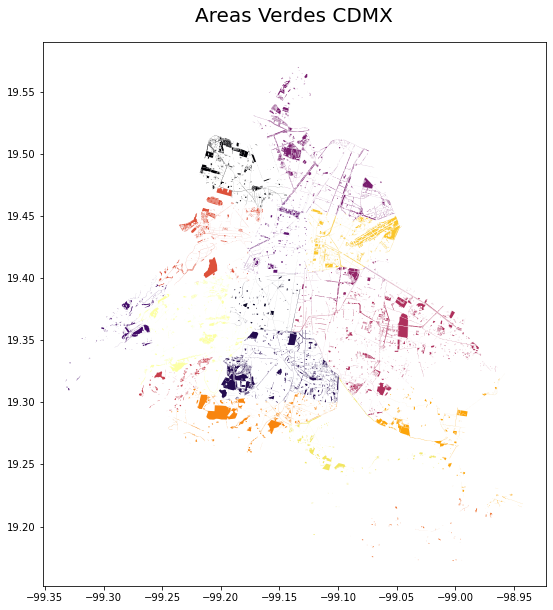

In [36]:
fig, ax = plt.subplots(1,1, figsize=(15, 10))

ax.set_title('Areas Verdes CDMX', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})


divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)

areas_delegacion.plot(column='delegacion', cmap='inferno', ax=ax, legend=False)
#plt.savefig("mapa_calor.svg", transparent=True)
plt.show()

### Contador de ciclistas CDMX 

In [116]:
ciclistas = pd.read_csv('https://github.com/JonathanMartignon/Data_CDMX_Un_Aire_No_Tan_Bueno/blob/main/Datos/contador-ciclistas.csv?raw=True')
ciclistas.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
0,jueves,5,diciembre,2013,2516.0,NaN,NaN
1,lunes,9,diciembre,2013,2132.0,NaN,NaN
2,viernes,22,junio,2018,2913.0,980.0,1163.0
3,martes,10,julio,2018,2531.0,877.0,1013.0
4,sábado,7,julio,2018,1534.0,616.0,584.0


In [121]:
ciclistas.shape

(2435, 7)

In [117]:
ciclistas['Año'].value_counts()

2016    366
2017    365
2015    365
2014    365
2018    351
2020    304
2019    273
2013     46
Name: Año, dtype: int64

In [118]:
ciclistas.columns

Index(['Día de la semana', 'Día', 'Mes', 'Año', 'Contador Ruta Reforma222',
       'Contador Ruta Revolución', 'Contador Ruta Patriotismo'],
      dtype='object')

In [119]:
ciclistas.dtypes

Día de la semana              object
Día                            int64
Mes                           object
Año                            int64
Contador Ruta Reforma222     float64
Contador Ruta Revolución     float64
Contador Ruta Patriotismo    float64
dtype: object

In [120]:
ciclistas.isnull().sum()

Día de la semana               0
Día                            0
Mes                            0
Año                            0
Contador Ruta Reforma222     285
Contador Ruta Revolución     992
Contador Ruta Patriotismo    988
dtype: int64

In [125]:
for col in ciclistas.columns:
    print()
    print('---------------')
    print(col)
    print()
    print(ciclistas[col].unique())


---------------
Día de la semana

['jueves' 'lunes' 'viernes' 'martes' 'sábado' 'domingo' 'miércoles'
 'sabado' 'miercoles']

---------------
Día

[ 5  9 22 10  7 29 27  6 28 16  3 30  1 14 26 21 17 23 24 25 11  2 12  4
 18 20 15 19 13 31  8]

---------------
Mes

['diciembre' 'junio' 'julio' 'septiembre' 'agosto' 'mayo' 'marzo'
 'octubre' 'noviembre' 'febrero' 'abril' 'enero']

---------------
Año

[2013 2018 2019 2014 2015 2016 2017 2020]

---------------
Contador Ruta Reforma222

[2516. 2132. 2913. ... 1778. 1861. 1782.]

---------------
Contador Ruta Revolución

[      nan 9.800e+02 8.770e+02 6.160e+02 6.030e+02 8.670e+02 8.030e+02
 1.125e+03 7.170e+02 6.450e+02 5.280e+02 4.640e+02 8.520e+02 7.850e+02
 8.090e+02 6.620e+02 2.510e+02 7.970e+02 5.730e+02 1.019e+03 1.183e+03
 1.168e+03 1.013e+03 1.080e+02 7.730e+02 4.870e+02 9.090e+02 8.720e+02
 9.750e+02 1.030e+02 9.110e+02 1.153e+03 9.500e+02 5.740e+02 1.133e+03
 9.810e+02 1.015e+03 5.490e+02 6.110e+02 8.660e+02 9.600e+02 7.650e+02


In [39]:
ciclistas_2020 = ciclistas[ciclistas["Año"] == 2020]
ciclistas_2020.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
2131,sabado,1,febrero,2020,1890.0,124.0,648.0
2132,viernes,7,febrero,2020,3778.0,226.0,1347.0
2133,sábado,15,febrero,2020,1939.0,153.0,677.0
2134,lunes,17,febrero,2020,3575.0,289.0,1284.0
2135,miércoles,19,febrero,2020,4058.0,287.0,1447.0


In [40]:
ciclistas_2019 = ciclistas[ciclistas["Año"] == 2019]
ciclistas_2019.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
8,martes,28,mayo,2019,4015.0,1125.0,1416.0
37,viernes,4,enero,2019,3133.0,662.0,846.0
123,viernes,3,mayo,2019,3821.0,1079.0,1261.0
124,domingo,10,febrero,2019,2131.0,655.0,651.0
125,domingo,3,febrero,2019,1909.0,337.0,566.0


In [41]:
ciclistas_2020_mes = ciclistas_2020[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

In [42]:
ciclistas_2019_mes = ciclistas_2019[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

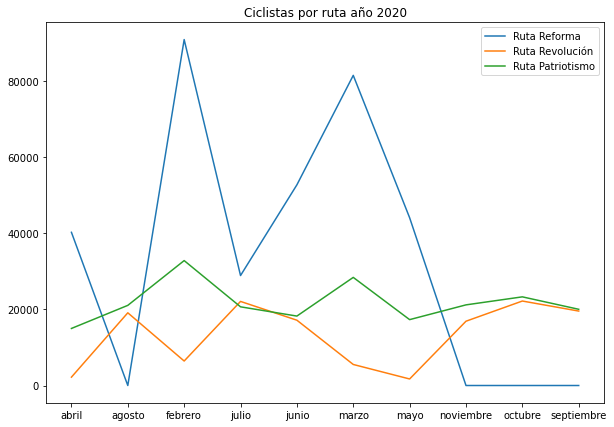

In [43]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2020_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2020_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2020_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2020")
plt.legend()
plt.show()

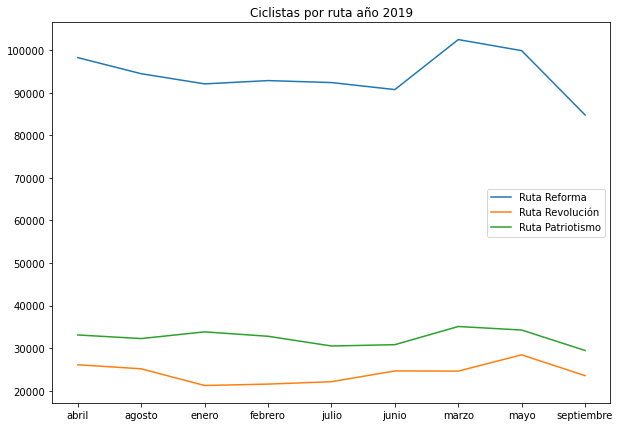

In [44]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2019_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2019_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2019_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2019")
plt.legend()
plt.show()

Podemos observar que la ruta que predomina es la ruta de reforma la cual abarca las delegaciones **Cuauhtémoc y Miguel Hidalgo**

# Contaminantes

In [127]:
Contaminantes = pd.read_csv('../Datos/Contaminantes/contaminantes.csv')
Contaminantes.head()

,Fecha,Nombre de estación,Clave de estación,Clave Parámetro,Nombre de parámetro,Unidades parámetros,Valor,ID Unidad,Clave de unidad,Nombre de unidad,Altura Estación,Observación Estación,ID Estación,Latitud,Longitud,Coordenadas
0,2020-02-15T20:00:00-06:00,Santa fe,SFE,NO2,Dióxido de nitrógeno,1,18.0,1,ppb,partes por billón,2599,NaN,484090040309,19.357357,-99.262865,"19.357357,-99.262865"
1,2020-02-15T20:00:00-06:00,Nezahualcóyotl,NEZ,NO2,Dióxido de nitrógeno,1,27.0,1,ppb,partes por billón,2235,NaN,484150580115,19.393734,-99.028212,"19.393734,-99.028212"
2,2020-02-15T20:00:00-06:00,San Agustín,SAG,O3,Ozono,1,8.0,1,ppb,partes por billón,2241,NaN,484150330327,19.532968,-99.030324,"19.532968,-99.030324"
3,2020-02-15T20:00:00-06:00,Villa de las Flores,VIF,O3,Ozono,1,6.0,1,ppb,partes por billón,2242,NaN,484150200109,19.658223,-99.096590,"19.658223,-99.09659"
4,2020-02-15T20:00:00-06:00,Milpa Alta,MPA,O3,Ozono,1,24.0,1,ppb,partes por billón,2594,NaN,484090090104,19.176900,-98.990189,"19.1769,-98.990189"


In [130]:
Contaminantes.shape

(469560, 16)

In [128]:
Contaminantes.columns

Index(['Fecha', 'Nombre de estación', 'Clave de estación', 'Clave Parámetro',
       'Nombre de parámetro', 'Unidades parámetros', 'Valor', 'ID Unidad',
       'Clave de unidad', 'Nombre de unidad', 'Altura Estación',
       'Observación Estación', 'ID Estación', 'Latitud', 'Longitud',
       'Coordenadas'],
      dtype='object')

In [131]:
Contaminantes.dtypes

Fecha                    object
Nombre de estación       object
Clave de estación        object
Clave Parámetro          object
Nombre de parámetro      object
Unidades parámetros       int64
Valor                   float64
ID Unidad                 int64
Clave de unidad          object
Nombre de unidad         object
Altura Estación           int64
Observación Estación     object
ID Estación               int64
Latitud                 float64
Longitud                float64
Coordenadas              object
dtype: object

In [134]:
round(((469560-456456)/469560)*100,2)

2.79

In [132]:
Contaminantes.isnull().sum()

Fecha                        0
Nombre de estación           0
Clave de estación            0
Clave Parámetro              0
Nombre de parámetro          0
Unidades parámetros          0
Valor                   121034
ID Unidad                    0
Clave de unidad              0
Nombre de unidad             0
Altura Estación              0
Observación Estación    456456
ID Estación                  0
Latitud                      0
Longitud                     0
Coordenadas                  0
dtype: int64

In [137]:
for col in Contaminantes.columns:
    print()
    print('-----------------')
    print(col)
    print()
    print(Contaminantes[col].unique())


-----------------
Fecha

['2020-02-15T20:00:00-06:00' '2020-02-16T14:00:00-06:00'
 '2020-02-16T15:00:00-06:00' ... '2020-03-31T01:00:00-06:00'
 '2020-03-31T02:00:00-06:00' '2020-03-31T03:00:00-06:00']

-----------------
Nombre de estación

['Santa fe' 'Nezahualcóyotl' 'San Agustín' 'Villa de las Flores'
 'Milpa Alta' 'Mguel Hidalgo' 'Pedregal' 'Acolman' 'Montecillo'
 'Ajusco Medio' 'Coyoacán' 'Centro de Ciencias de la Atmósfera'
 'Tultitlán' 'FES Aragón' 'Tlahuac' 'Atizapan' 'Chalco' 'UAM Xochimilco'
 'Investigaciones Nucleares' 'La Presa' 'UAM Iztapalapa' 'Benito Juárez'
 'Gustavo A. Madero' 'San Juan Aragón' 'Xalostoc' 'Santiago Acahualtepec'
 'Camarones' 'Hospital General de México' 'Iztacalco' 'Tlalnepantla'
 'Cuajimalpa' 'FES Acatlán' 'Cuautitlán' 'Los Laureles' 'Merced' 'Ajusco']

-----------------
Clave de estación

['SFE' 'NEZ' 'SAG' 'VIF' 'MPA' 'MGH' 'PED' 'ACO' 'MON' 'AJM' 'COY' 'CCA'
 'TLI' 'FAR' 'TAH' 'ATI' 'CHO' 'UAX' 'INN' 'LPR' 'UIZ' 'BJU' 'GAM' 'SJA'
 'XAL' 'SAC' 'CAM'

# Estaciones Eco-bici

In [139]:
Eco_bici = pd.read_csv('../Datos/estaciones-de-ecobici.csv')
Eco_bici.head()

,ID,Nombre,Dirección,Número,Código postal,districtCode,Colonia,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
0,86,86 SULLIVAN-INSURGENTES,086 - Sullivan-Insurgentes,S/N,6470.0,1,Ampliación Granada,NaN,12,19.432378,-99.159077,"BIKE,TPV",20.0,NaN,NaN,NaN,NaN,"19.432378,-99.159077"
1,250,250 DARWIN-MARIANO ESCOBEDO,250 - Darwin-Mariano Escobedo,S/N,11510.0,1,Ampliación Granada,NaN,239,19.429057,-99.179660,"BIKE,TPV",249.0,252.0,NaN,NaN,NaN,"19.429057,-99.17966"
2,273,273 LUIS DONALDO COLOSIO-AV. CENTRAL,273 Luis Donaldo Colosio - Av. Jesus Garcia,S/N,NaN,1,Ampliación Granada,NaN,176,19.442707,-99.152956,BIKE,268.0,274.0,NaN,NaN,NaN,"19.442707,-99.152956"
3,278,278 MIER Y PESADO-OBRERO MUNDIAL,278 - Mier Y Pesado-Obrero Mundial,S/N,3103.0,1,Ampliación Granada,NaN,164,19.400710,-99.163831,BIKE,279.0,282.0,NaN,NaN,NaN,"19.40071,-99.163831"
4,305,305 AVENIDA DEL PARQUE-ARIZONA,305 - Avenida Del Parque-Arizona,S/N,3810.0,1,Ampliación Granada,NaN,304,19.394693,-99.175531,"BIKE,TPV",306.0,307.0,NaN,NaN,NaN,"19.394693,-99.175531"


In [140]:
Eco_bici.shape

(480, 18)

In [141]:
Eco_bici.columns

Index(['ID', 'Nombre', 'Dirección', 'Número', 'Código postal', 'districtCode',
       'Colonia', 'altitude', 'nearbyStations/0', 'location/lat',
       'location/lon', 'Tipo de estación', 'nearbyStations/1',
       'nearbyStations/2', 'nearbyStations/3', 'nearbyStations/4',
       'nearbyStations/5', 'punto_geo'],
      dtype='object')

In [142]:
Eco_bici.dtypes

ID                    int64
Nombre               object
Dirección            object
Número               object
Código postal       float64
districtCode         object
Colonia              object
altitude            float64
nearbyStations/0      int64
location/lat        float64
location/lon        float64
Tipo de estación     object
nearbyStations/1    float64
nearbyStations/2    float64
nearbyStations/3    float64
nearbyStations/4    float64
nearbyStations/5    float64
punto_geo            object
dtype: object

In [149]:
round(((480-477)/480)*100,2)

0.62

In [143]:
Eco_bici.isnull().sum()

ID                    0
Nombre                0
Dirección             0
Número                0
Código postal       149
districtCode          1
Colonia               1
altitude            480
nearbyStations/0      0
location/lat          0
location/lon          0
Tipo de estación      0
nearbyStations/1     17
nearbyStations/2     59
nearbyStations/3    444
nearbyStations/4    477
nearbyStations/5    477
punto_geo             0
dtype: int64